<a href="https://colab.research.google.com/github/LisithaDiz/ML/blob/main/Laptop_Prize_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [277]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ML csv/laptop_price.csv', encoding='latin-1')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [278]:
df = df.drop('Product', axis=1)

In [279]:
df = df.join(pd.get_dummies(df.Company))
df = df.drop('Company', axis=1)

df = df.join(pd.get_dummies(df.TypeName))
df = df.drop('TypeName', axis=1)

df = df.join(pd.get_dummies(df.OpSys))
df = df.drop('OpSys', axis=1)

In [280]:
df['ScreenResolution'] = df.ScreenResolution.str.split(' ').apply(lambda x: x[-1])
df['Screen_Width'] = df.ScreenResolution.str.split('x').apply(lambda x: x[0])
df['Screen_Hight'] = df.ScreenResolution.str.split('x').apply(lambda x: x[1])
df = df.drop('ScreenResolution', axis=1)

In [281]:
df['Cpu_brand'] = df.Cpu.str.split(' ').apply(lambda x:x[0])
df['Cpu_frequenzy']=df.Cpu.str.split(' ').apply(lambda x:x[-1])
df = df.drop('Cpu', axis=1)

In [282]:
df['Cpu_frequenzy'] = df['Cpu_frequenzy'].str[:-3]
df['Ram'] = df['Ram'].str[:-2]

In [283]:
df['Cpu_frequenzy'] = df['Cpu_frequenzy'].astype('float')
df['Ram'] = df['Ram'].astype('int')

df['Screen_Width'] = df['Screen_Width'].astype('int')
df['Screen_Hight'] = df['Screen_Hight'].astype('int')


In [284]:
df['Memory_Amount'] = df.Memory.str.split(' ').apply(lambda x: x[0])
df['Memory_Type'] = df.Memory.str.split(' ').apply(lambda x: x[1])
# df['Memory_Amount'].value_counts()
# df['Memory_Type'].value_counts()

In [285]:
def turn_memeory_amount_toMB(value):
  if 'GB' in value:
    return float(value[:value.find('GB')])*1000
  elif 'TB' in value:
    return float(value[:value.find('TB')])*1000000

In [286]:
df['Memory_Amount'] = df['Memory_Amount'].apply(turn_memeory_amount_toMB)
df = df.drop('Memory', axis=1)

In [287]:
df['Weight'] = df['Weight'].str[:-2]
df['Weight'] = df['Weight'].astype('float')

In [288]:
df['Gpu_brand'] = df.Gpu.str.split(' ').apply(lambda x: x[0])
df = df.drop('Gpu', axis=1)

In [289]:
cpu_catogories = pd.get_dummies(df['Cpu_brand'])
cpu_catogories.columns = [col + '_CPU' for col in cpu_catogories.columns]
df = df.join(cpu_catogories)
df = df.drop('Cpu_brand', axis=1)

In [290]:
gpu_catogories = pd.get_dummies(df['Gpu_brand'])
gpu_catogories.columns = [col + '_GPU' for col in gpu_catogories.columns]
df = df.join(gpu_catogories)
df = df.drop('Gpu_brand', axis=1)

<ipython-input-291-b0d424d9ee96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


<Axes: >

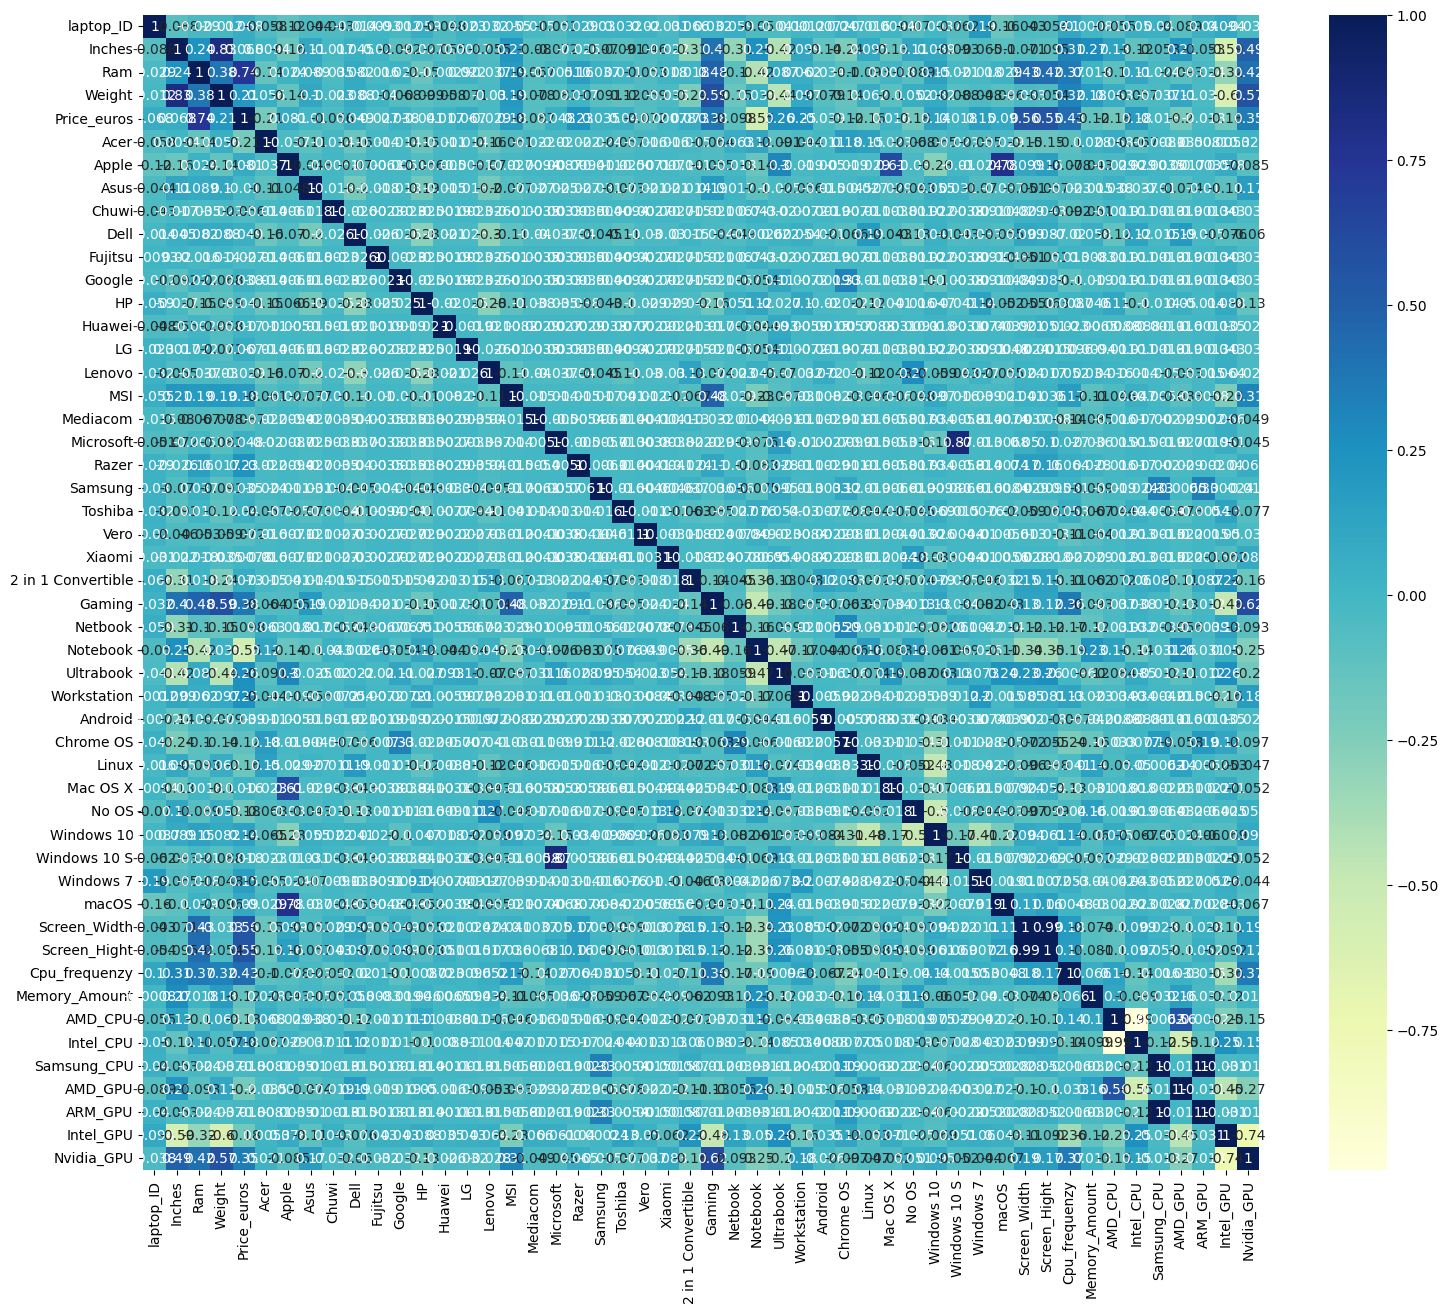

In [291]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [292]:
target_correlation = df.corr()['Price_euros'].apply(abs).sort_values()
target_correlation

<ipython-input-292-9328d4de74c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_correlation = df.corr()['Price_euros'].apply(abs).sort_values()


Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory_Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI     

In [293]:
feature_selection = target_correlation[-20:].index
feature_selection = list(feature_selection)
feature_selection

['Linux',
 'No OS',
 'MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'Cpu_frequenzy',
 'Notebook',
 'Screen_Hight',
 'Screen_Width',
 'Ram',
 'Price_euros']

In [294]:
limited_df = df[feature_selection]
limited_df

,Linux,No OS,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,Razer,Workstation,Ultrabook,Nvidia_GPU,Gaming,Cpu_frequenzy,Notebook,Screen_Hight,Screen_Width,Ram,Price_euros
0,0,0,0,0,1,1,0,0,1.37,0,0,1,0,0,2.3,0,1600,2560,8,1339.69
1,0,0,0,0,1,1,0,0,1.34,0,0,1,0,0,1.8,0,900,1440,8,898.94
2,0,1,0,0,1,1,0,0,1.86,0,0,0,0,0,2.5,1,1080,1920,8,575.00
3,0,0,0,0,1,0,1,0,1.83,0,0,1,0,0,2.7,0,1800,2880,16,2537.45
4,0,0,0,0,1,1,0,0,1.37,0,0,1,0,0,3.1,0,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,1,1,0,0,1.80,0,0,0,0,0,2.5,0,1080,1920,4,638.00
1299,0,0,0,0,1,1,0,0,1.30,0,0,0,0,0,2.5,0,1800,3200,16,1499.00
1300,0,0,0,0,1,1,0,0,1.50,0,0,0,0,0,1.6,1,768,1366,2,229.00
1301,0,0,0,0,1,0,1,0,2.19,0,0,0,0,0,2.5,1,768,1366,6,764.00


<Axes: >

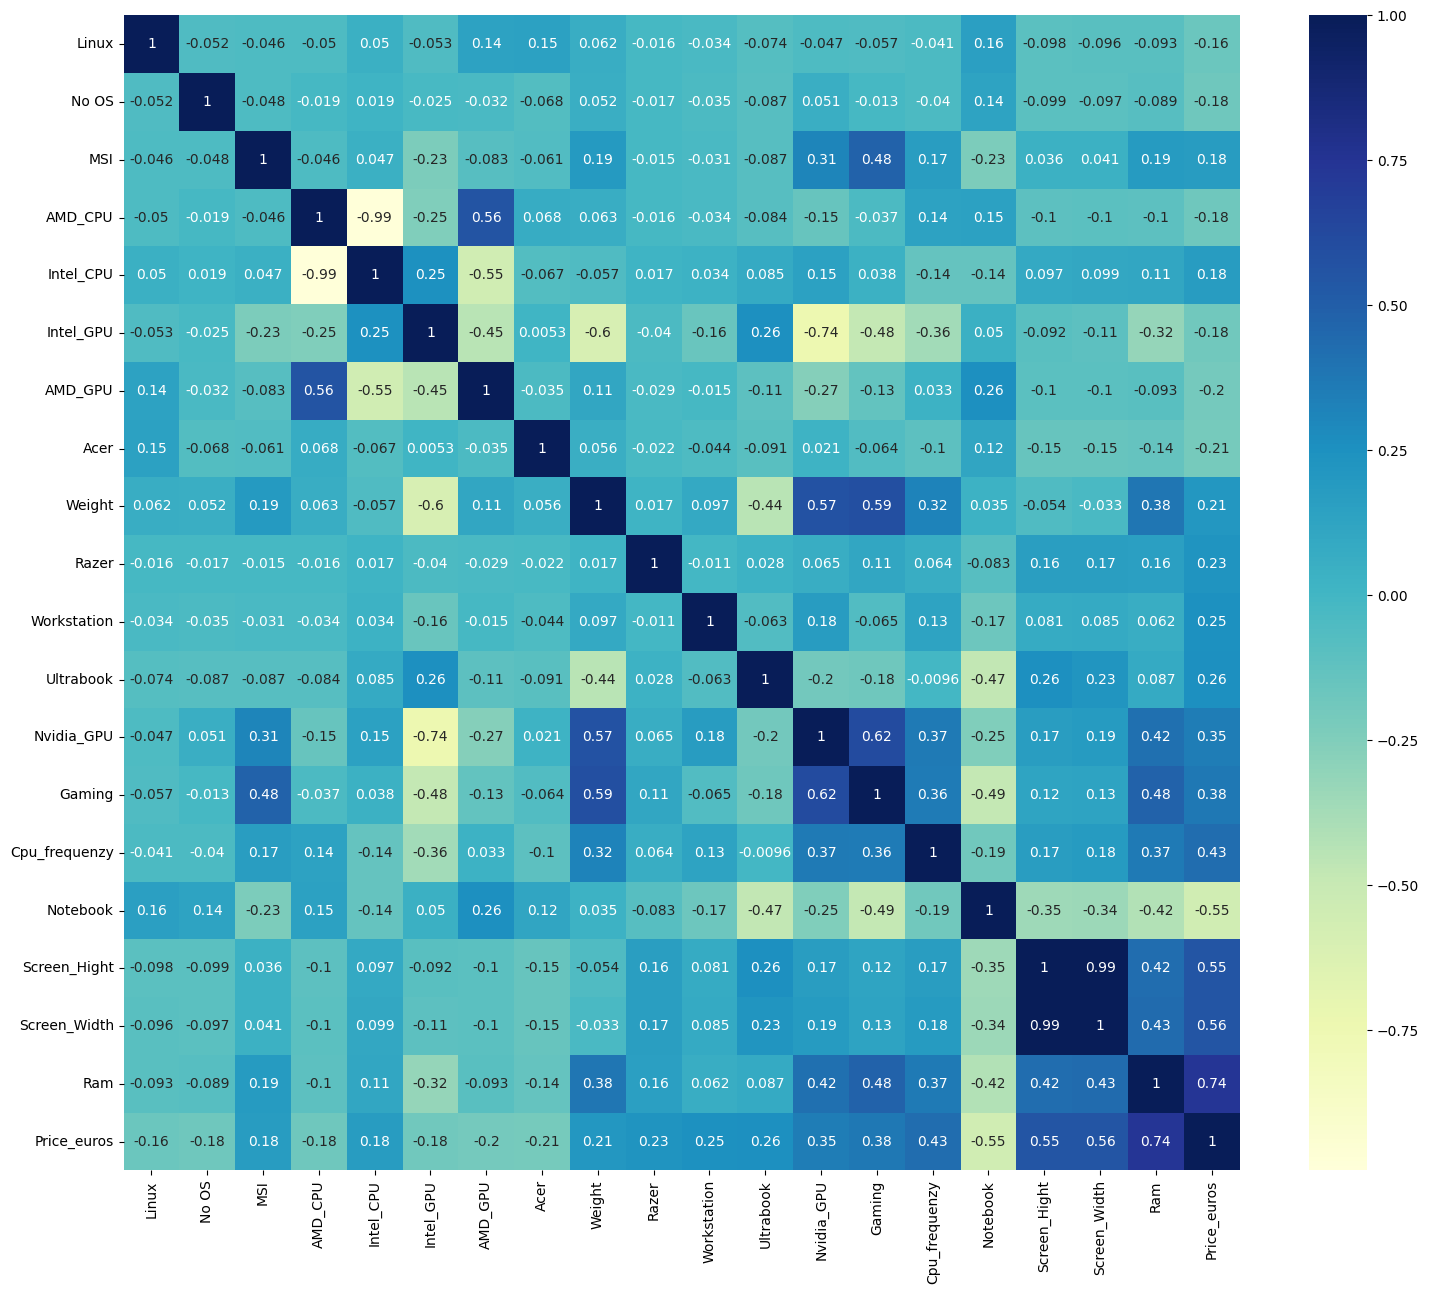

In [295]:
plt.figure(figsize=(18,15))
sns.heatmap(limited_df.corr(), annot=True, cmap = 'YlGnBu')

In [315]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = limited_df.drop('Price_euros', axis=1) , limited_df['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

In [316]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor() 
forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [305]:
forest.score(X_test_scaled, y_test)

0.8138160877840585

In [306]:
y_pred = forest.predict(X_test_scaled)

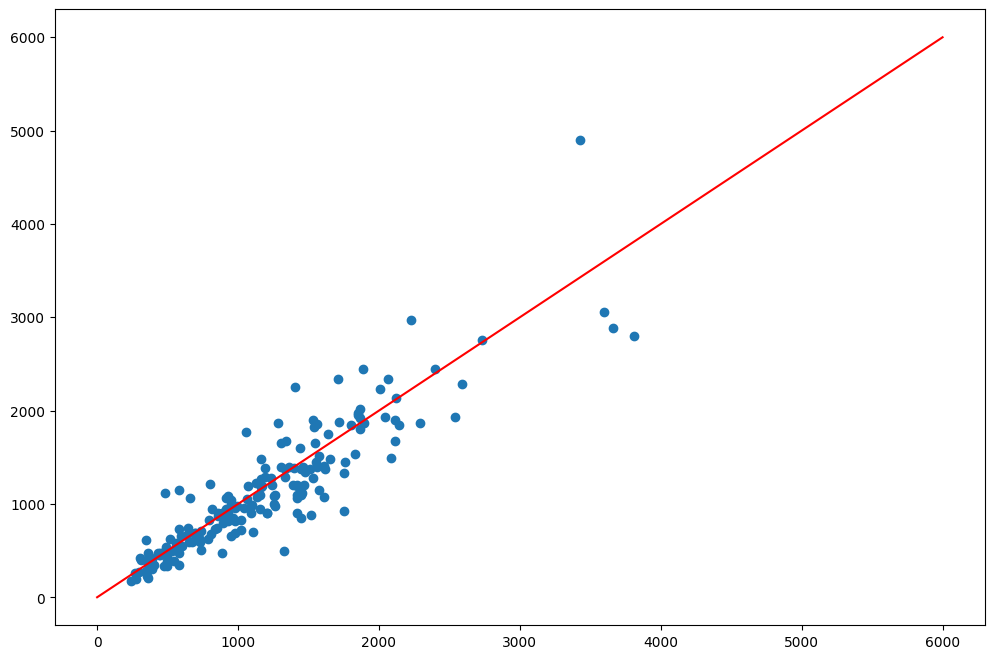

In [309]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c='red')

In [310]:
X_test.iloc[0]

Linux               0.0
No OS               0.0
MSI                 0.0
AMD_CPU             0.0
Intel_CPU           1.0
Intel_GPU           1.0
AMD_GPU             0.0
Acer                0.0
Weight              1.2
Razer               0.0
Workstation         0.0
Ultrabook           0.0
Nvidia_GPU          0.0
Gaming              0.0
Cpu_frequenzy       2.3
Notebook            1.0
Screen_Hight     1080.0
Screen_Width     1920.0
Ram                 4.0
Name: 981, dtype: float64

In [312]:
X_new_scaled = scalar.transform([X_test.iloc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [313]:
forest.predict(X_new_scaled)

array([1171.12507])

In [314]:
y_test.iloc[0]

1195.0